In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# error_bad_lines=False #加入参数
df_2018 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2018.csv")
df_2019 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2019.csv")
df_2020 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2020.csv")
df_2021 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021.csv")

# 将四个数据框合并为一个
frames = [df_2018, df_2019, df_2020, df_2021]
df = pd.concat(frames)

In [3]:
len(df)

8846265

In [4]:
df_ = df[df['APR MDC Description'] != 
         'NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD']

In [5]:
df_1 = df_[df_['APR MDC Description'] != 
         'PREGNANCY, CHILDBIRTH AND THE PUERPERIUM']

In [6]:
len(df_1)

7079048

In [7]:
df_1['APR MDC Description'].value_counts()

DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM                                            1102440
DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM                                             799045
DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE                   747865
DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM                                               681588
INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)                            626438
DISEASES AND DISORDERS OF THE NERVOUS SYSTEM                                                 583952
MENTAL DISEASES AND DISORDERS                                                                411599
DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT                                       381808
ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND DISORDERS                                  302834
ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS                           277258


In [8]:
list_mental_issue = ['DISEASES AND DISORDERS OF THE NERVOUS SYSTEM', 'MENTAL DISEASES AND DISORDERS', 'ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS']

In [9]:
df_mental = df_1[df_1['APR MDC Description'].isin(list_mental_issue)]

In [10]:
len(df_mental)

1272809

In [11]:
df_mental.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Capital/Adirond,Columbia,1001000.0,146.0,Columbia Memorial Hospital,50 to 69,125,F,White,Not Span/Hispanic,2,Elective,Short-term Hospital,2018,CIR020,CEREBRAL INFARCTION,NaN,NaN,45.0,CVA & PRECEREBRAL OCCLUSION W INFARCT,1.0,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,3.0,Major,Major,Medical,"Managed Care, Unspecified",Self-Pay,NaN,NaN,True,"17,591.41","3,570.06"
2,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,False,"5,600","4,161.53"
10,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,30 to 49,112,M,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,2018,NVS009,EPILEPSY; CONVULSIONS,IMG008,ULTRASONOGRAPHY,53.0,SEIZURE,1.0,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2.0,Moderate,Minor,Medical,Medicaid,Medicaid,NaN,NaN,True,"20,225.67","14,367.53"
17,Western NY,Erie,1401014.0,207.0,Buffalo General Medical Center,70 or Older,141,F,White,Not Span/Hispanic,3,Emergency,Expired,2018,CIR021,ACUTE HEMORRHAGIC CEREBROVASCULAR DISEASE,NaN,NaN,44.0,INTRACRANIAL HEMORRHAGE,1.0,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,4.0,Extreme,Extreme,Medical,Medicare,Self-Pay,NaN,NaN,True,"10,060.84","4,574.2"
32,Hudson Valley,Westchester,5907001.0,1099.0,SJRH - Park Care Pavilion,50 to 69,107,F,Black/African American,Not Span/Hispanic,3,Emergency,Another Type Not Listed,2018,MBD017,ALCOHOL-RELATED DISORDERS,SUD001,SUBSTANCE USE DETOXIFICATION,774.0,COCAINE ABUSE & DEPENDENCE,20.0,ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGA...,3.0,Major,Minor,Medical,Medicaid,NaN,NaN,NaN,False,"6,163.4","2,051.6"


In [15]:
df_mental['Zip Code - 3 digits'].unique()

array(['125', '100', '112', '141', '107', '120', 'OOS', '104', '108',
       '126', '147', '145', '103', '117', '113', '114', '142', '115',
       '124', '143', '106', '110', '105', '116', '121', '133', '134', nan,
       '136', '131', '109', '123', '119', '144', '139', '137', '140',
       '146', '128', '130', '122', '118', '132', '148', '101', '127',
       '129', '111', '138', '149', '135'], dtype=object)

In [14]:
df_mental['Zip Code - 3 digits'] = df_mental['Zip Code - 3 digits'].astype(int)

ValueError: invalid literal for int() with base 10: 'OOS'

In [61]:
df['Zip Code - 3 digits'].max()

TypeError: '>=' not supported between instances of 'str' and 'float'

In [58]:
df_mental['Race'].unique()

array(['White', 'Black/African American', 'Other Race', 'Multi-racial'],
      dtype=object)

In [59]:
df_mental['Hospital County'].unique()

array(['Columbia', 'Manhattan', 'Kings', 'Erie', 'Westchester', 'Ontario',
       'Queens', 'Dutchess', 'Richmond', 'Bronx', 'Nassau', 'Suffolk',
       'Montgomery', 'Ulster', 'Onondaga', 'Monroe', 'Schenectady', nan,
       'Orange', 'Oneida', 'Chautauqua', 'Rockland', 'Wyoming', 'Broome',
       'Warren', 'Wayne', 'Albany', 'Tompkins', 'Cayuga', 'Cortland',
       'Putnam', 'Franklin', 'Rensselaer', 'Saratoga', 'Steuben',
       'Niagara', 'St Lawrence', 'Chemung', 'Otsego', 'Sullivan',
       'Jefferson', 'Cattaraugus', 'Genesee', 'Fulton', 'Madison',
       'Delaware', 'Chenango', 'Oswego', 'Clinton', 'Livingston', 'Yates',
       'Lewis', 'Allegany', 'Essex', 'Schoharie', 'Orleans', 'Herkimer',
       'Schuyler'], dtype=object)

In [60]:
len(df_mental['Hospital County'].unique())

58

In [39]:
df_mental['Discharge Year'].dtype

dtype('int64')

In [44]:
df_mental_year = df_mental[['Discharge Year','Operating Certificate Number']].groupby(by=['Discharge Year']).count()
df_year = df[['Discharge Year','Operating Certificate Number']].groupby(by=['Discharge Year']).count()

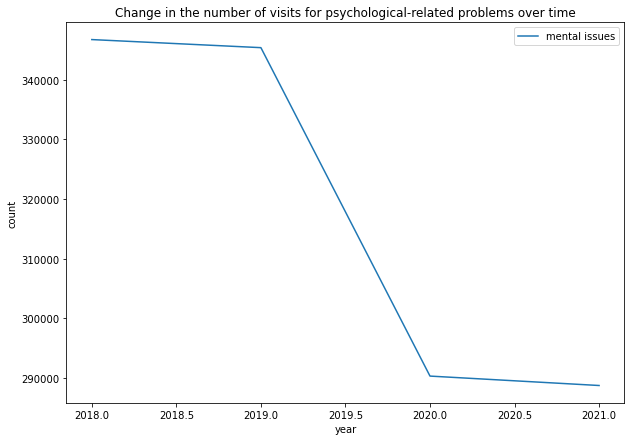

In [48]:
fig = plt.figure(figsize=(10,7))
plt.plot(df_mental_year.index, df_mental_year['Operating Certificate Number'], label="mental issues")
# plt.plot(df_year.index, df_year['Operating Certificate Number'], label="all")
plt.xlabel("year")
plt.ylabel("count")
plt.title("Change in the number of visits for psychological-related problems over time")
plt.legend()
plt.show()

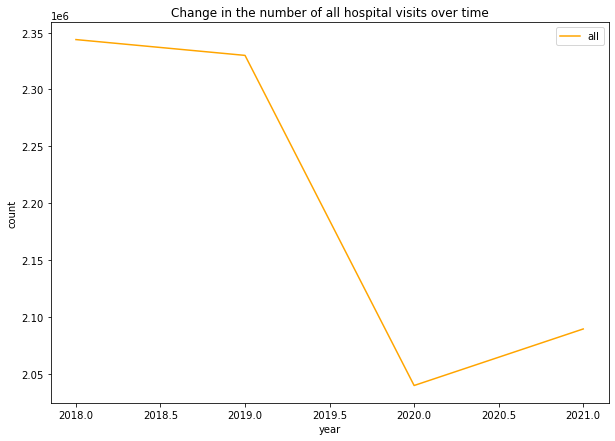

In [53]:
fig = plt.figure(figsize=(10,7))
#plt.plot(df_mental_year.index, df_mental_year['Operating Certificate Number'], label="mental issues")
plt.plot(df_year.index, df_year['Operating Certificate Number'], label="all", c = 'orange')
plt.xlabel("year")
plt.ylabel("count")
plt.title("Change in the number of all hospital visits over time")
plt.legend()
plt.show()

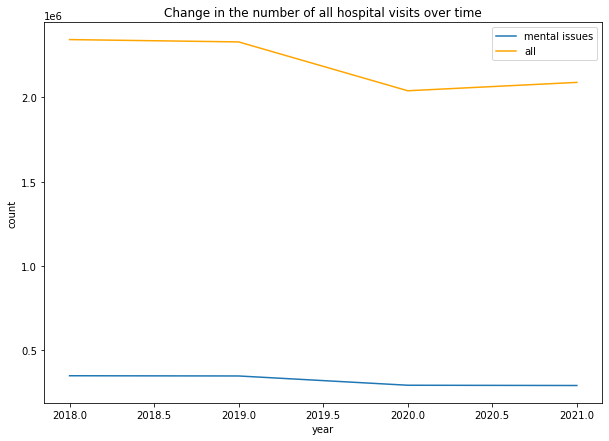

In [54]:
fig = plt.figure(figsize=(10,7))
plt.plot(df_mental_year.index, df_mental_year['Operating Certificate Number'], label="mental issues")
plt.plot(df_year.index, df_year['Operating Certificate Number'], label="all", c = 'orange')
plt.xlabel("year")
plt.ylabel("count")
plt.title("Change in the number of all hospital visits over time")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Discharge Year'>

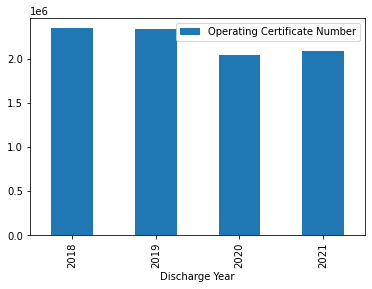

In [42]:
df[['Discharge Year','Operating Certificate Number']].groupby(by=['Discharge Year']).count().plot.bar()